<a href="https://colab.research.google.com/github/masanchezpa/AlgorithmsUN2024-I/blob/main/LabLML/masanchezpa_LML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding maximum number for an array with n numbers with a Neural Network (MLPRegressor)

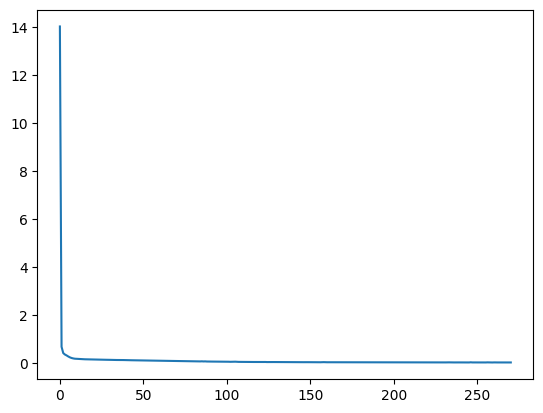


Some data before the actual results:

Accuracy testing : 0.999
The mean error is 0.10864334170023147
The mean error with y_pred rounded is 0.010222222222222223



,X,y,y_pred_round,error_b_round,y_pred,error
0,"[9, 10, 9, 7, 2, 10, 2, 8, 3, 3]",10,10,0,10.157528,0.157528
1,"[4, 1, 10, 2, 8, 3, 1, 2, 2, 7]",10,10,0,9.920832,0.079168
2,"[1, 5, 1, 8, 1, 6, 9, 7, 7, 2]",9,9,0,8.935490,0.064510
3,"[1, 5, 0, 9, 0, 5, 8, 8, 5, 10]",10,10,0,10.119306,0.119306
4,"[3, 8, 8, 8, 3, 8, 4, 8, 0, 0]",8,9,1,8.554911,0.554911
...,...,...,...,...,...,...
8995,"[16, 10, 6, 8, 12, 14, 0, 18, 4, 2]",18,18,0,17.895815,0.104185
8996,"[6, 8, 16, 18, 0, 2, 12, 4, 14, 10]",18,18,0,17.788069,0.211931
8997,"[2, 0, 14, 6, 10, 12, 16, 8, 18, 4]",18,18,0,17.831336,0.168664
8998,"[12, 18, 16, 2, 10, 4, 0, 14, 6, 8]",18,18,0,17.756878,0.243122


In [ ]:
# Without organizing the numbers
import random as rnd
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import pandas as pd

n=10
minNumber = 0
maxNumber = 10
Nexamples=3000

X =[]
y =[]

for j in range(Nexamples):
  curr = np.array([rnd.randint(minNumber, maxNumber) for a in range(n)])
  X.append(curr)
  y.append(np.max(curr))

for j in range(Nexamples):
  list1 = list(np.array(range(n)))
  rnd.shuffle(list1)
  X.append(np.array(list1))
  y.append(np.max(list1))

for j in range(Nexamples):
  list1 = list(2*np.array(range(n)))
  rnd.shuffle(list1)
  X.append(np.array(list1))
  y.append(np.max(list1))

model = MLPRegressor(hidden_layer_sizes=(100,50,20), max_iter=1000, activation='relu').fit(X,y)
y_pred =model.predict(X)


plt.plot(model.loss_curve_)
plt.show()

print()
print("Some data before the actual results:")
print()
print('Accuracy testing : {:.3f}'.format(model.score(X,y)))

data = pd.DataFrame({'X': [a for a in X], 'y':[a for a in y], 'y_pred_round':[round(a) for a in y_pred], 'error_b_round':[abs(a-round(b)) for a,b in zip(y, y_pred)], 'y_pred':[a for a in y_pred], 'error':[abs(a-b) for a,b in zip(y, y_pred)]})
print(f"The mean error is {data.loc[:, 'error'].mean()}")
print(f"The mean error with y_pred rounded is {data.loc[:, 'error_b_round'].mean()}")
print()
data

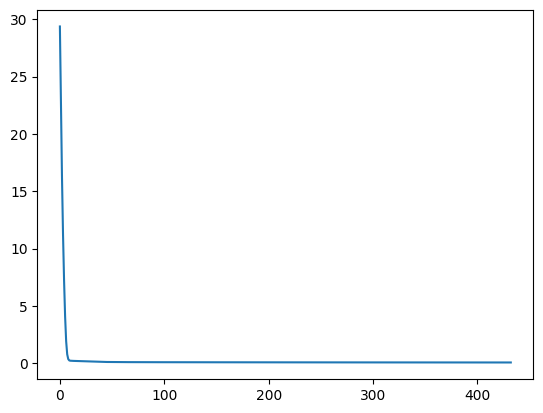


Some data before the actual results:

Accuracy testing : 0.917
The mean error is 0.2686086112671028



,X,y,y_pred,error
0,"[6, 3, 1, 9, 8, 5, 5, 2, 1, 10]",10,9.624330,0.375670
1,"[8, 10, 0, 0, 2, 10, 0, 3, 9, 0]",10,10.755401,0.755401
2,"[6, 4, 9, 0, 10, 10, 6, 2, 9, 0]",10,10.395880,0.395880
3,"[2, 10, 6, 7, 1, 5, 10, 7, 7, 2]",10,10.335205,0.335205
4,"[8, 5, 4, 0, 3, 6, 0, 5, 3, 10]",10,9.269867,0.730133
...,...,...,...,...
2995,"[14, 12, 6, 16, 8, 18, 0, 4, 2, 10]",18,18.167734,0.167734
2996,"[14, 8, 0, 4, 2, 10, 6, 16, 18, 12]",18,17.854313,0.145687
2997,"[0, 2, 8, 14, 16, 12, 10, 18, 6, 4]",18,18.299913,0.299913
2998,"[14, 12, 2, 4, 10, 6, 16, 8, 0, 18]",18,17.899917,0.100083


In [ ]:
# Organizing the numbers
import random as rnd
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import pandas as pd

maxNumber = 10
n = maxNumber
minNumber = 0
Nexamples = 1000

X =[]
y =[]

for j in range(Nexamples):
  curr = np.array([rnd.randint(minNumber, maxNumber) for a in range(n)])
  X.append(curr)
  y.append(np.sort(curr))

for j in range(Nexamples):
  y.append(np.array(range(n)))
  list1 = list(np.array(range(n)))
  rnd.shuffle(list1)
  X.append(np.array(list1))

for j in range(Nexamples):
  y.append(2*np.array(range(n)))
  list1 = list(2*np.array(range(n)))
  rnd.shuffle(list1)
  X.append(np.array(list1))

model = MLPRegressor(hidden_layer_sizes=(100,50,20), max_iter=1000, activation='relu').fit(X,y)
y_pred =model.predict(X)

plt.plot(model.loss_curve_)
plt.show()

print()
print("Some data before the actual results:")
print()
print('Accuracy testing : {:.3f}'.format(model.score(X,y)))

data = pd.DataFrame({'X': [a for a in X], 'y':[a[-1] for a in y], 'y_pred':[a[-1] for a in y_pred]})
data['error'] = (data['y'] - data['y_pred']).abs()
print(f"The mean error is {data.loc[:, 'error'].mean()}")
print()
data

# Finding maximum number for an array with n numbers with a Classification and Regression Tree (CART)

In [ ]:
# Without organizing the numbers
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd

n=10
minNumber = 0
maxNumber = 10
Nexamples=3000

X =[]
y =[]

for j in range(Nexamples):
  curr = np.array([rnd.randint(minNumber, maxNumber) for a in range(n)])
  X.append(curr)
  y.append(np.max(curr))

for j in range(Nexamples):
    list1 = list(range(n))
    rnd.shuffle(list1)
    X.append(np.array(list1))
    y.append(np.max(list1))

for j in range(Nexamples):
    list1 = list(2*np.array(range(n)))
    rnd.shuffle(list1)
    X.append(np.array(list1))
    y.append(np.max(list1))

model = DecisionTreeRegressor(max_leaf_nodes = 15).fit(X,y)
y_pred = model.predict(X)

print()
print("Some data before the actual results:")
print()
print('Accuracy testing : {:.3f}'.format(model.score(X,y)))

data = pd.DataFrame({'X': [a for a in X], 'y':[a for a in y], 'y_pred_round':[round(a) for a in y_pred], 'error_b_round':[abs(a-round(b)) for a,b in zip(y, y_pred)], 'y_pred':[a for a in y_pred], 'error':[abs(a-b) for a,b in zip(y, y_pred)]})
print(f"The mean error is {data.loc[:, 'error'].mean()}")
print(f"The mean error with y_pred rounded is {data.loc[:, 'error_b_round'].mean()}")
print()
data


Some data before the actual results:

Accuracy testing : 0.986
The mean error is 0.25389322837824185
The mean error with y_pred rounded is 0.20933333333333334



,X,y,y_pred_round,error_b_round,y_pred,error
0,"[8, 7, 0, 1, 7, 8, 8, 5, 6, 8]",8,9,1,9.140963,1.140963
1,"[9, 10, 0, 2, 8, 1, 0, 3, 6, 4]",10,9,1,9.140963,0.859037
2,"[4, 9, 9, 4, 2, 3, 1, 10, 4, 7]",10,10,0,10.000000,0.000000
3,"[9, 10, 1, 0, 7, 10, 8, 8, 7, 9]",10,9,1,9.140963,0.859037
4,"[6, 4, 4, 2, 8, 9, 2, 10, 3, 9]",10,10,0,10.000000,0.000000
...,...,...,...,...,...,...
8995,"[6, 16, 0, 14, 18, 12, 10, 2, 8, 4]",18,18,0,18.000000,0.000000
8996,"[14, 10, 8, 2, 6, 12, 18, 4, 16, 0]",18,18,0,18.000000,0.000000
8997,"[6, 12, 14, 18, 10, 16, 2, 0, 8, 4]",18,18,0,18.000000,0.000000
8998,"[18, 2, 6, 12, 0, 10, 8, 16, 14, 4]",18,18,0,18.000000,0.000000


In [ ]:
# Organizing the numbers
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd

n=10
minNumber = 0
maxNumber = 10
Nexamples=3000

X =[]
y =[]

for j in range(Nexamples):
  curr = np.array([rnd.randint(minNumber, maxNumber) for a in range(n)])
  X.append(curr)
  y.append(np.sort(curr))

for j in range(Nexamples):
    y.append(np.array(range(n)))
    list1 = list(range(n))
    rnd.shuffle(list1)
    X.append(np.array(list1))

for j in range(Nexamples):
    y.append(2*np.array(range(n)))
    list1 = list(2*np.array(range(n)))
    rnd.shuffle(list1)
    X.append(np.array(list1))

model = DecisionTreeRegressor(max_leaf_nodes = 50).fit(X,y)
y_pred = model.predict(X)

print()
print("Some data before the actual results:")
print()
print('Accuracy testing : {:.3f}'.format(model.score(X,y)))

data = pd.DataFrame({'X': [a for a in X], 'y':[a[-1] for a in y], 'y_pred':[a[-1] for a in y_pred]})
data['error'] = (data['y'] - data['y_pred']).abs()
print(f"The mean error is {data.loc[:, 'error'].mean()}")
print()
data


Some data before the actual results:

Accuracy testing : 0.744
The mean error is 0.18544710164831388



,X,y,y_pred,error
0,"[0, 7, 3, 9, 6, 3, 5, 2, 8, 0]",9,9.110345,0.110345
1,"[10, 8, 0, 4, 4, 4, 1, 5, 9, 2]",10,10.000000,0.000000
2,"[7, 6, 1, 3, 5, 1, 5, 1, 4, 1]",7,9.058824,2.058824
3,"[0, 4, 2, 8, 0, 2, 6, 2, 4, 5]",8,9.022388,1.022388
4,"[6, 5, 2, 0, 2, 7, 10, 0, 0, 3]",10,10.000000,0.000000
...,...,...,...,...
8995,"[0, 18, 6, 10, 12, 16, 2, 8, 14, 4]",18,18.000000,0.000000
8996,"[2, 12, 6, 16, 8, 10, 18, 4, 0, 14]",18,18.000000,0.000000
8997,"[16, 12, 6, 18, 4, 0, 2, 14, 8, 10]",18,18.000000,0.000000
8998,"[6, 2, 4, 10, 16, 18, 14, 8, 0, 12]",18,18.000000,0.000000
